Link to this notebook in Google Collab: https://colab.research.google.com/drive/1W5ShVmT6yjOZz361Nc7156ndcjaxUUkf?usp=sharing

# Problem 1: Design a model


Keeping up with the spirit of coronavirus, let us model the spread of an infectious disease in a city and how well the quarantine could restrict infection. Unlike the Cellular Automata model, we will try to make it more realistic. This could be modeled using Cellular Automata, but our cells would need to have a class of their own so that they can save some of the properties of the cells. We will model the interaction of people inside a city which has no social distancing but people will be quarantined if they are found to be infected. Our microscopic components are the people of the city. We could analyze it at greater scales where we divide each block of people into a city and then compare how the interaction spreads to different cities. Although we may want to model the spread across cities to decide whether to shut travel down, but the most important thing is to deal with the issues at home first. So, I think modeling individual people inside a city is a more informational scale to model. The interaction between people could take multiple forms. People will go out and meet people, they will have coworkers, people will also go to central locations like grocery stores and gyms. All this could be partially modeled by just making our cells do a random walk and measuring the proximity of cells. Moore neighborhood will be the most appropriate neighborhood choice and we would want our radius to be greater than 1, but not very large. First up, the possible states for each cell:


1.   Empty: There is no person in this cell
2.   Healthy: The person in the cell is healthy
3.   Infected: The person in the cell is infected but has not been detected and quarantined yet.
4.   Quarantined: The person was found to be infected and removed from the system.
5.   Incubated: The person has been infected for 't' timesteps where 't' is the timeperiod after which the person is at the risk of dying or could recover.
6.   Dead: Death from infection.



Rules for transition between states:


1.   An empty cell becomes a healthy cell with probability 'b'. Consider this the birth probability, but it could include all possibilities through which the population of our system grows.
2.   A healthy cell becomes infected by probability 'i' if it is surrounded by 1 or more infected or incubated cells.
3.   An infected cell will be quarantined with probability 'q'. 
4.   The infected cell will turn to incubated after 't' timesteps of being infected and not quarantined.
4.   An incubated cell will turn to dead state with probability 'd'.
5.   An incubated cell will turn to a healthy state with probability 'r'. 
6.   A quarantined cell will not interact with other cells. 
7.   A quarantined cell becomes healthy after 'R' timesteps.
8.   A dead state will turn empty with probability 1.


Assumptions:


1.   We will model possible interaction between people by making our cells do random walk. 
2.   We assume the possibility of dying or recovering happens after 't' timesteps. This is a realistic assumption but the value of 't' could largely vary for individuals. So, we assume it is the same for everyone.
3.   People already infected once can get infected again with the same probability. This is also not a very realistic assumption as the probability of reinfection should decrease. But, if we run 2 different simulation with same probability of reinfection and a simulation with 0 probability of reinfection, we can get the upper and lower bound on transmission.
4.   The quarantined cells will recover and become healthy after 'R' timesteps. Once again, this is not realistic since people may die in quarantine but for simplicity we assume all quarantined people will live.
5.   The model does not distinguish between symptomatic and asymptomatic infections. These should be included in the probabilities themselves.



If we model this on a computer, I think we would see very interesting behaviors. Depending on the individual probabilities of infectious, quarantine, death, and recovery, we will find that there are cases when the city always has infectious cases, i.e., the disease does not vanish or recede. There are few ways to make the disease vanish from the system. One is to quarantine with probability 1. Another may be to remove the people who were already infected from the pool of people that can get infected. Lastly, if the rate of infection is very low, rate of death is very high, and probability of quarantine is very high, we may see cases where the disease vanishes. 




# Problem 2: Is the random module random?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

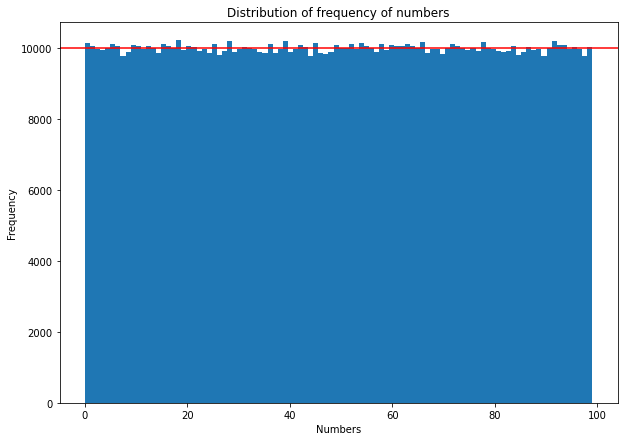

In [ ]:
np.random.seed(99)  #not the best method for long documents but fine for us
numbers = np.random.randint(100, size=1000000)

#1 - Histogram of the values
plt.figure(figsize= (10, 7))
plt.hist(numbers, bins = 100)
plt.title("Distribution of frequency of numbers")
plt.xlabel("Numbers")
plt.ylabel("Frequency")
plt.axhline(y = 10000, color = 'r') #horizontal line for expected frequency
plt.show()

2. Since we have a uniform distribution, the probability of each number is the same. Since we have 100 possible numbers, each number will appear with probability of 0.01. For a sample size of 1,000,000 that translates to a frequency of 10,000 for each number. This is marked by a red horizontal line in above histogram. From the histogram, we see that each number indeed appear around 10,000 times. There are still variations because of emperical errors, but they are not large. This can be seen from the expected value and variance for the data. The theoretical mean and variance for the uniform distribution from 0 to 99 are 49.5 and 816.75 respectively. The data that we obtained has a mean of 49.48 and a variance of 833.21 as calculated below.

In [ ]:
num_mean = np.mean(numbers)
num_var = np.var(numbers)
expected_mean = 99/2
expected_var = (99**2)/12 #variance of a uniform distrbution

print(f"Expected Mean = {expected_mean} and actual mean = {num_mean}")
print(f"Expected Variance = {expected_var} and actual variance = {num_var}")

Expected Mean = 49.5 and actual mean = 49.480199
Expected Variance = 816.75 and actual variance = 833.2087019203993


According to central limit theorem, the sum (or any other aggregate property) of independent random variables is distributed according to their normal distribution. Since the numbers we got from random module are independent, their sum should also fall into a Gaussian distribution. 


We can verify this emperically. The expected value for the sum will just be expected value of selecting a number from the uniform distribution times the number of samples we draw from the distribution. Hence, in our case, expected value of sum = 49500000. Similarly, the variance of the sum will also be the product of original variance times number of samples. Hence, the variance of sum = 816750000.


We can now plot a Gaussian distribution for these parameters, and try to fit on a histogram of data of sum of random numbers. To do this, we must run multiple trials. I choose to run 10000 trials. This is not a large number but anything larger than this takes a lot of computational power to run.

In [ ]:
#test the results using central limit theorem
#perform multiple trials of random choice of numbers
num_trials = 10000
sums = []
for i in range(num_trials):
    numbers = np.random.randint(100, size=1000000)
    sum_ = np.sum(numbers)
    sums.append(sum_)
    if i%1000 == 0:
        print(f"Done {i} trials") #so we know code is working

Done 0 trials
Done 1000 trials
Done 2000 trials
Done 3000 trials
Done 4000 trials
Done 5000 trials
Done 6000 trials
Done 7000 trials
Done 8000 trials
Done 9000 trials


In [ ]:
#emperical values of mean and variance
num_sum_mean = np.mean(sums)
num_sum_var = np.var(sums)

#theoretical values of mean and variance of sums
expected_sum_mean = expected_mean*1000000
expected_sum_var = expected_var*1000000
print(f"Expected Mean of sum = {expected_sum_mean}")
print(f"Actual mean of sums = {num_sum_mean}")
print(f"Expected Variance of sum = {expected_sum_var}")
print(f"actual variance of sums = {num_sum_var}")

Expected Mean of sum = 49500000.0
Actual mean of sums = 49500380.0659
Expected Variance of sum = 816750000.0
actual variance of sums = 848037010.4175572


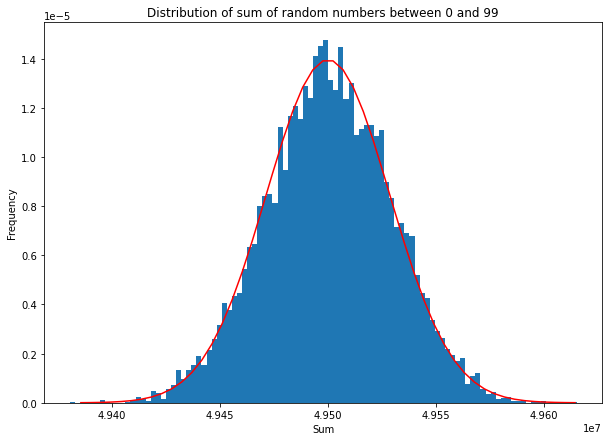

In [ ]:
#create the normal distribution
norm_mean = expected_sum_mean
norm_std = np.sqrt(expected_sum_var)
norm_dist = sts.norm(loc = norm_mean, scale = norm_std)

#plot from mu-4*std to mu+4*std
xs = np.linspace(norm_mean-4*norm_std, norm_mean+4*norm_std)
ys = norm_dist.pdf(xs)   #y values for the normal distrbution

#plot it!!!
plt.figure(figsize= (10, 7))
plt.plot(xs, ys, color = 'r')
plt.hist(sums, bins = 100, density = True)  #density = True to normalize
plt.title("Distribution of sum of random numbers between 0 and 99")
plt.xlabel("Sum")
plt.ylabel("Frequency")
plt.show()

As we can see from the above figure, the distribution of sums indeed follows the Normal distribution that we would expect. Hence, the data from random module meets the expectations from Central Limit Theorem. The variations in the above figure can be explained by the fact that we only ran 10000 trials whereas the total range of possibilities is over a million. Hence, to get a histogram much closer to the plot, we would need to run at least 10 million trials (or play a trick and lower the bin numbers).

# Problem 3: Forest fire mean-field approximation


Attached at the end of this pdf. Also available at this link: https://drive.google.com/file/d/1lRyl-Mt1ijjJzMCtkSVlpxSm1wOUX2gv/view?usp=sharing



# Problem 4: Wireworld


Note that the animation for Wireworld will only run in an online notebook, so Google Collab or Colab. It will not work on local files since we are converting the animation to HTML. The animation is included in the .zip folder.

In [2]:
#import required modules
import matplotlib.colors as cls
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm

In [3]:
#function to make animation - taken from session 6
def make_animation(sim, total_frames, steps_per_frame=1, interval=100):

    def update(frame_number):
        for _ in range(steps_per_frame):
	        sim.step()
        progress_bar.update(1)
        return [sim.draw()]

    sim.initialize()
    progress_bar = tqdm(total=total_frames)
    animation = FuncAnimation(
        sim.figure, update, init_func=lambda: [], frames=total_frames, 
        interval=interval)
    output = HTML(animation.to_html5_video())
    sim.figure.clf()
    return output

In [4]:
class WireworldSimulator:
    '''
    Simulate the Wireworld model using this class.
    '''

    def __init__(self, initial_config, radius=1):
        '''
        Initialize new WireworldSimulator object with an initial configuration.

        Inputs:

            initial_config (ndarray) An array of initial configuration for the
              system. Must be a 2-dimensional array. Each cell has 4 states - 
              0 for background, 1 for electron head, 2 for electron tail, and
              3 for wire
            
            radius (int) The radius of the neighborhoods in the CA.
              Must be a positive integer. Default: 1.
        '''
        self.current_state = initial_config
        self.size = initial_config.shape
        self.radius = radius
        self.step_counter = 0

    def initialize(self):
        '''
        This will be called by the animator. It basically just creates figure
        for the figure function to use.
        '''
        # Create a new figure for use in the draw() method below
        self.figure, self.axes = plt.subplots()

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        new_cmap = cls.ListedColormap(["black", "blue", "red", "yellow"])
        plot = self.axes.imshow(
            self.current_state, vmin=0, vmax=3, cmap=new_cmap)
        self.axes.set_title(f'State at step {self.step_counter}')
        return plot

    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        size_x = self.current_state.shape[0]
        size_y = self.current_state.shape[1]
        #place holder for new state
        new_state = np.zeros(self.current_state.shape)

        #first change all electron heads to tails
        electron_heads = np.where(self.current_state == 1)
        new_state[electron_heads] = 2

        #change all electron tails to wire
        electron_tails = np.where(self.current_state == 2)
        new_state[electron_tails] = 3

        #copy wire to new_state, we will change later
        wire = np.where(self.current_state == 3)
        new_state[wire] = 3

        #print(new_state)
        #array of only electron heads
        head_state = np.where(self.current_state == 1, 1, 0)
        total = np.zeros(self.current_state.shape) #empty array to store sum
        
        #get sum of electron heads in Moore neighborhood
        for dx in range(-self.radius, self.radius+1):
            shifted_state = np.roll(head_state, shift=dx, axis=1)
            for dy in range(-self.radius, self.radius+1):
                total += np.roll(shifted_state, shift=dy, axis=0)
        
        #change wire to electron head if sum = 1 or 2
        for i in range(size_x):
            for j in range(size_y):
                if self.current_state[i, j] == 3 and \
                (total[i, j] == 1 or total[i, j] == 2):
                    new_state[i, j] = 1
        
        self.current_state = new_state
        self.step_counter += 1

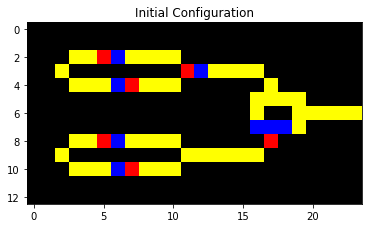

In [5]:
#replicate animation from Wikipedia
initial_config = np.zeros((13, 24))

#set all the wire arms
initial_config[[2, 4, 8, 10], 3:11] = 3
initial_config[[3, 9], 2] = 3
initial_config[[3, 9], 11:17] = 3
initial_config[[5, 7], 16:20] = 3
initial_config[6, 19:24] = 3
initial_config[[4, 6, 8], [17, 16, 17]] = 3

#set the electron heads
initial_config[[2, 4, 8, 10], 6] = 1
initial_config[7, 16:19] = 1
initial_config[3, 12] = 1

#set the electron tails
initial_config[[2, 4, 8, 10, 8, 3], [5, 7, 5, 7, 17, 11]] = 2


#visualize the initial configuration to check
new_cmap = cls.ListedColormap(["black", "blue", "red", "yellow"])
plt.imshow(initial_config, vmin=0, vmax=3, cmap=new_cmap)
plt.title("Initial Configuration")
plt.show()

In [6]:
wireworld_sim = WireworldSimulator(initial_config)
make_animation(wireworld_sim, total_frames = 100)

100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


<Figure size 432x288 with 0 Axes>